https://github.com/afeinstein20/eleanor/blob/main/notebooks/eleanor_tesscut_demo.ipynb

In [1]:
import os

assert os.environ['CONDA_DEFAULT_ENV']=='toi5671'

In [1]:
import eleanor
import numpy as np
import matplotlib.pyplot as plt

2024-01-11 13:08:28.414761: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 13:08:28.452318: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 13:08:28.452345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 13:08:28.453460: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 13:08:28.459527: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 13:08:28.459931: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [195]:
do_psf = False

sector = 16
star_s16 = eleanor.Source(tic=23863105, sector=sector, tc=True)
data_s16 = eleanor.TargetData(star_s16, height=20, width=20, 
                              aperture_mode='small',
                              bkg_size=None, 
                              do_psf=do_psf, do_pca=False)

/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/eleanor/targetdata.py:326: UserWarning: We force our TPFs to have an odd height and width             so we can properly center our apertures.
  warnings.warn('We force our TPFs to have an odd height and width \


In [141]:
data_s16.bkg_type

'PC_LEVEL'

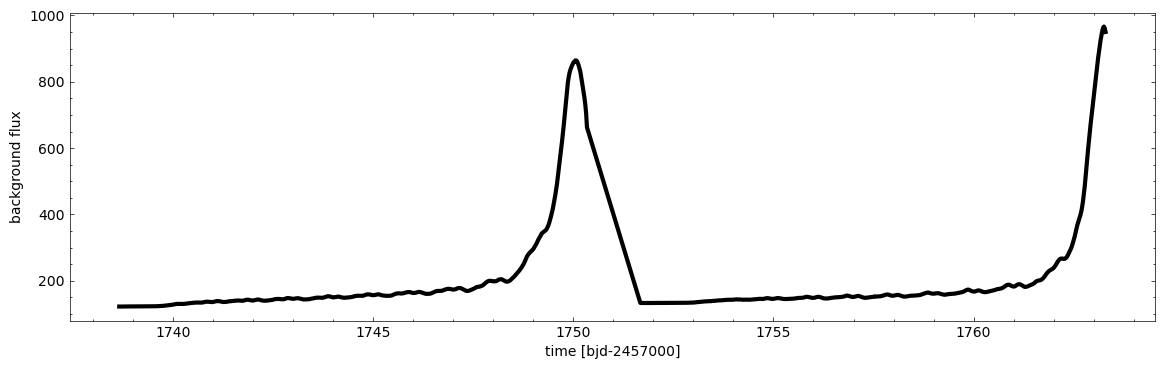

In [147]:
plt.figure(figsize=(14,4))
plt.plot(data_s16.time, data_s16.post_obj.bkg, 'k', lw=3)
plt.xlabel('time [bjd-2457000]')
plt.ylabel('background flux');

In [148]:
data_s16.aperture.shape 

(9, 9)

In [198]:
use_custom_aper = True #rectangular aper similar to CPM 
if use_custom_aper:
    data_s16.aperture[:] = 0
    data_s16.aperture[8:14,8:14] = 1
    data_s16.get_lightcurve()

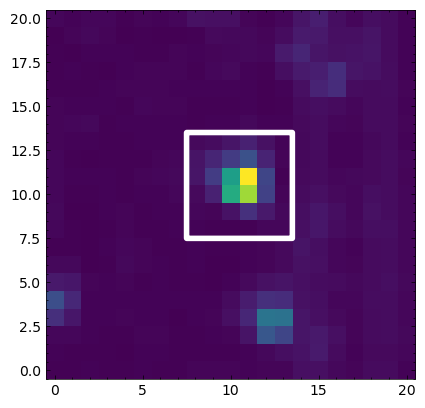

In [199]:
vis = eleanor.Visualize(data_s16)
fig = vis.aperture_contour()

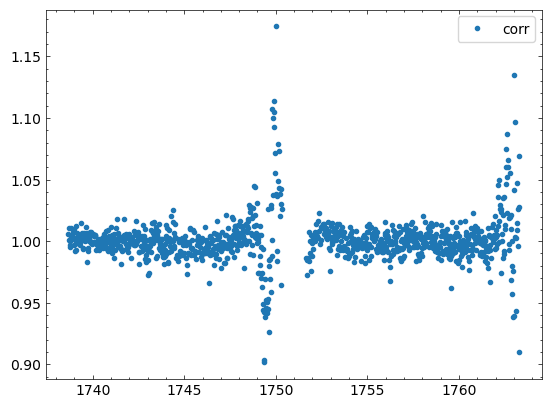

In [200]:
q = data_s16.quality == 0
time_s16 = data_s16.time[q]
corr_flux_s16 = data_s16.corr_flux[q]/np.median(data_s16.corr_flux[q])
plt.plot(time_s16, corr_flux_s16, '.', label='corr')
# plt.plot(data.time[q], data_s16.raw_flux[q]/np.median(data_s16.raw_flux[q]), '.', label='raw')
plt.legend()

In [201]:
do_psf = False

sector = 23
star_s23 = eleanor.Source(tic=23863105, sector=sector, tc=True)
data_s23 = eleanor.TargetData(star_s23, height=20, width=20,
                              aperture_mode='large',
                              bkg_size=None, 
                              do_psf=do_psf, do_pca=False)

/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/eleanor/targetdata.py:326: UserWarning: We force our TPFs to have an odd height and width             so we can properly center our apertures.
  warnings.warn('We force our TPFs to have an odd height and width \


In [206]:
if use_custom_aper:
    data_s23.aperture[:] = 0
    data_s23.aperture[7:13,8:14] = 1
    data_s23.get_lightcurve()

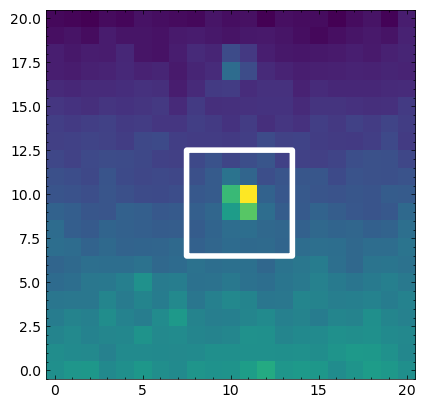

In [207]:
vis = eleanor.Visualize(data_s23)
fig = vis.aperture_contour()

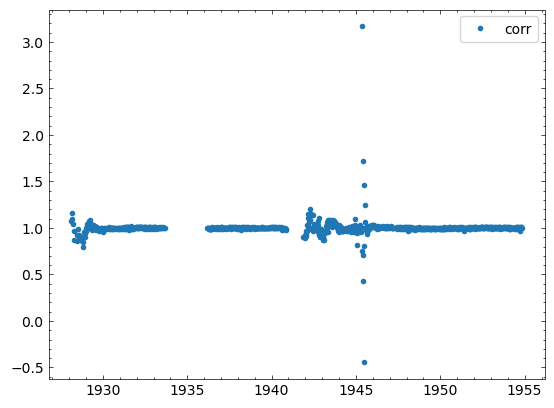

In [208]:
q = data_s23.quality == 0
time_s23 = data_s23.time[q]
corr_flux_s23 = data_s23.corr_flux[q]/np.median(data_s23.corr_flux[q])
plt.plot(time_s23, corr_flux_s23, '.', label='corr')
# plt.plot(data.time[q], data.raw_flux[q]/np.median(data.raw_flux[q]), '.', label='raw')
plt.legend()

In [ ]:
do_psf = False

sector = 50
star_s50 = eleanor.Source(tic=23863105, sector=sector, tc=True)
data_s50 = eleanor.TargetData(star_s50, height=20, width=20, 
                              aperture_mode='large',
                              bkg_size=None, 
                              do_psf=do_psf, do_pca=False)

In [210]:
if use_custom_aper:
    data_s50.aperture[:] = 0
    data_s50.aperture[8:14,8:14] = 1
    data_s50.get_lightcurve()

/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/eleanor/targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/eleanor/targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/eleanor/targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/eleanor/targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)


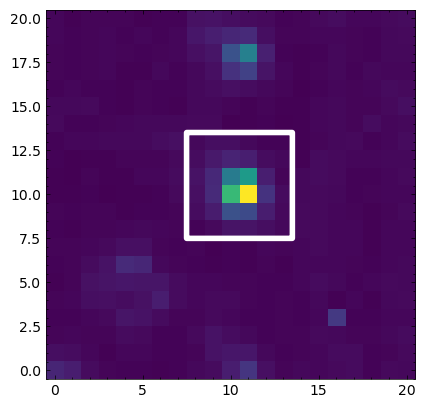

In [211]:
vis = eleanor.Visualize(data_s50)
fig = vis.aperture_contour()

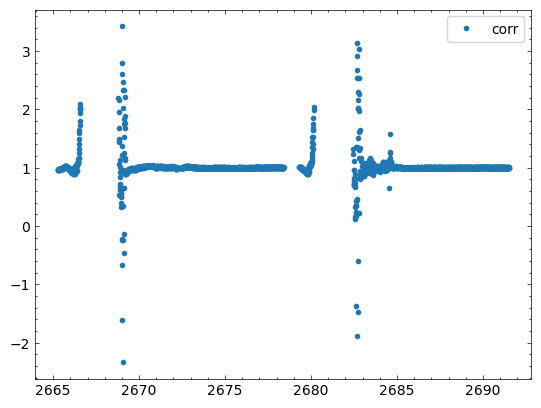

In [212]:
q = data_s50.quality == 0
time_s50 = data_s50.time[q]
corr_flux_s50 = data_s50.corr_flux[q]/np.median(data_s50.corr_flux[q])
plt.plot(time_s50, corr_flux_s50, '.', label='corr')
# plt.plot(data_s50.time[q], data_s50.raw_flux[q]/np.median(data_s50.raw_flux[q]), '.', label='raw')
plt.legend()

(0.9, 1.1)

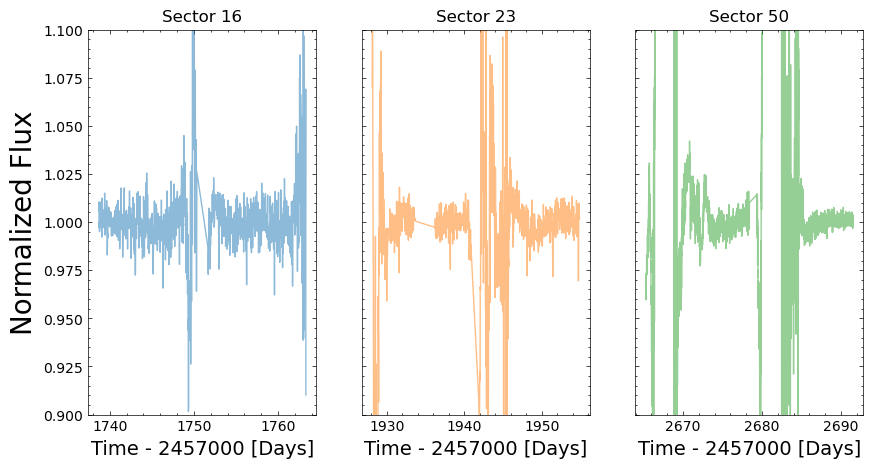

In [213]:
fig, axs = plt.subplots(1,3, figsize=(10, 5), sharey=True)
ax = axs.flatten()

ax[0].plot(time_s16, corr_flux_s16, c="C0", label="Sector 16", alpha=0.5)
# ax[0].plot(time_s16, s16_detrended_flux2, c="C0", label="Sector 16")
ax[1].plot(time_s23, corr_flux_s23, c="C1", label="Sector 23", alpha=0.5)
# ax[1].plot(time_s23, s23_detrended_flux2, c="C1", label="Sector 23")
ax[2].plot(time_s50, corr_flux_s50, c="C2", label="Sector 50", alpha=0.5)
# ax[2].plot(time_s50, s50_detrended_flux2, c="C2", label="Sector 50")

ax[0].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[1].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[2].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[0].set_ylabel("Normalized Flux", fontsize=20)
ax[0].set_title("Sector 16")
ax[1].set_title("Sector 23")
ax[2].set_title("Sector 50")
ax[0].set_ylim(0.9, 1.1)
# savefig(fig, '../figures/tess_cpm_lightcurves.png', dpi=300, writepdf=False)

In [214]:
import pandas as pd


df1 = pd.DataFrame(np.c_[time_s16+2457000, 
                   corr_flux_s16,
                   np.ones_like(time_s16)+np.nanstd(corr_flux_s16)], 
             columns=['time','flux','err']
            ).dropna()
df2 = pd.DataFrame(np.c_[time_s23+2457000, 
                   corr_flux_s23,
                   np.ones_like(time_s23)+np.nanstd(corr_flux_s23)], 
             columns=['time','flux','err']
            ).dropna()
df3 = pd.DataFrame(np.c_[time_s50+2457000, 
                   corr_flux_s50,
                   np.ones_like(time_s50)+np.nanstd(corr_flux_s50)], 
             columns=['time','flux','err']
            ).dropna()
df1, df2, df3

(              time      flux      err
 0     2.458739e+06  1.005855  1.01899
 1     2.458739e+06  1.010410  1.01899
 2     2.458739e+06  1.001263  1.01899
 3     2.458739e+06  0.997160  1.01899
 4     2.458739e+06  1.000128  1.01899
 ...            ...       ...      ...
 1036  2.458763e+06  1.026155  1.01899
 1037  2.458763e+06  0.996176  1.01899
 1038  2.458763e+06  1.027395  1.01899
 1039  2.458763e+06  1.069092  1.01899
 1040  2.458763e+06  0.910254  1.01899
 
 [1041 rows x 3 columns],
              time      flux       err
 0    2.458928e+06  1.070062  1.095614
 1    2.458928e+06  1.097972  1.095614
 2    2.458928e+06  1.156877  1.095614
 3    2.458928e+06  1.043916  1.095614
 4    2.458928e+06  0.972000  1.095614
 ..            ...       ...       ...
 968  2.458955e+06  0.991372  1.095614
 969  2.458955e+06  1.004738  1.095614
 970  2.458955e+06  1.008773  1.095614
 971  2.458955e+06  1.009749  1.095614
 972  2.458955e+06  1.001427  1.095614
 
 [973 rows x 3 columns],
         

In [215]:
df = pd.concat([df1,df2,df3], axis=0)
df.head()

,time,flux,err
0,2.458739e+06,1.005855,1.01899
1,2.458739e+06,1.010410,1.01899
2,2.458739e+06,1.001263,1.01899
3,2.458739e+06,0.997160,1.01899
4,2.458739e+06,1.000128,1.01899


In [216]:
df.to_csv('../data/tess_eleanor_s16s23s50.csv', index=False)

In [217]:
df_ele = pd.read_csv('../data/tess_eleanor_s16s23s50.csv')
df_ele.head()

,time,flux,err
0,2.458739e+06,1.005855,1.01899
1,2.458739e+06,1.010410,1.01899
2,2.458739e+06,1.001263,1.01899
3,2.458739e+06,0.997160,1.01899
4,2.458739e+06,1.000128,1.01899


In [218]:
df_cpm = pd.read_csv('../data/tess_cpm_s16s23s50.csv')
df_cpm.head()

,time,flux,err
0,2.458739e+06,0.999975,1.023056
1,2.458739e+06,0.994739,1.023056
2,2.458739e+06,1.001697,1.023056
3,2.458739e+06,1.021017,1.023056
4,2.458739e+06,0.996665,1.023056


In [219]:
from aesthetic.plot import savefig, set_style
set_style('science')

Text(0.5, 1.0, 'Sector 50')

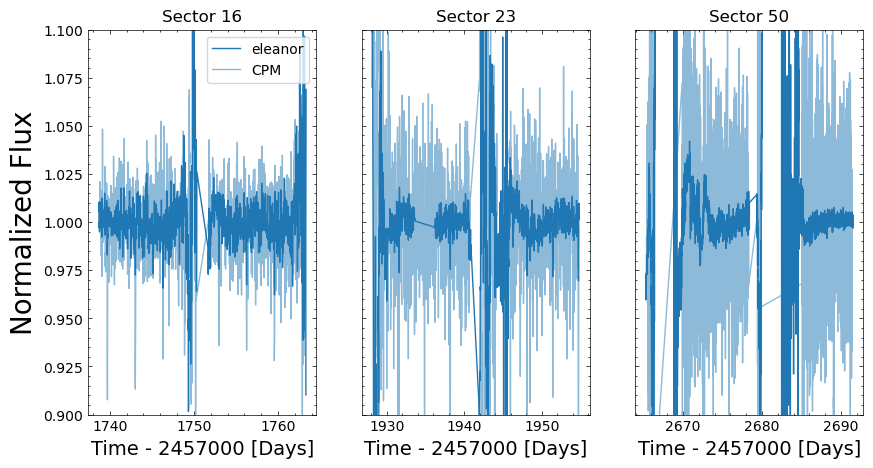

In [220]:
fig, axs = plt.subplots(1,3, figsize=(10, 5), sharey=True)
ax = axs.flatten()

c1, c2 = 'C0', 'C0'

i = 0
idx = df_ele.time<1780+2457000
df = df_ele[idx]
ax[i].plot(df.time-2457000, df.flux, '-', c=c1, label="eleanor", alpha=1)
idx = df_cpm.time<1780+2457000
df = df_cpm[idx]
ax[i].plot(df.time-2457000, df.flux, '-', c=c2, label="CPM", alpha=0.5)
ax[i].legend()

i = 1
idx = (df_ele.time>1920+2457000) & (df_ele.time<1960+2457000)
df = df_ele[idx]
ax[i].plot(df.time-2457000, df.flux, '-', c=c1, label="eleanor", alpha=1)
idx = (df_cpm.time>1920+2457000) & (df_cpm.time<1960+2457000)
df = df_cpm[idx]
ax[i].plot(df.time-2457000, df.flux, '-', c=c2, label="CPM", alpha=0.5)
# ax[i].legend()

i = 2
idx = (df_ele.time>2660+2457000) & (df_ele.time<2700+2457000)
df = df_ele[idx]
ax[i].plot(df.time-2457000, df.flux, '-', c=c1, label="eleanor", alpha=1)
idx = (df_cpm.time>2660+2457000) & (df_cpm.time<2700+2457000)
df = df_cpm[idx]
ax[i].plot(df.time-2457000, df.flux, '-', c=c2, label="CPM", alpha=0.5)
# ax[i].legend()

ax[i].set_ylim(0.9, 1.1)

ax[0].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[1].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[2].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[0].set_ylabel("Normalized Flux", fontsize=20)
ax[0].set_title("Sector 16")
ax[1].set_title("Sector 23")
ax[2].set_title("Sector 50")

shallower depths in eleanor perhaps due to dilution or improper background subtraction

In [221]:
savefig(fig, '../figures/tess_cpm_eleanor_lc_comparison.png', dpi=300, writepdf=False)

2024-01-11T06:54:51.185393: made ../figures/tess_cpm_eleanor_lc_comparison.png
